 ## Problem Statement
 
- Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

- We need to analyse the data to find insights from it using univariate, bivariate and other data analysis techniques. Based on the analysis, we can inform netflix what kind of projects they can work upon and what are the patterns/trends we have observed in the dataset. This will help netflix to have recommendations for users.

- To approach this usecase, I have followed the following strategy

    - Check the shape of the data along with what kind of data we have i.e. how many categorical/numerical variables are present.
    - I have divided the dataset into two parts. One will be tv shows and other one will be movies. This will be useful since movies and tv shows forms two different categories and its better to analyse them separately.
    - Checking out for missing values, outliers and their handling
    - Analyzing both the dataset using univariate and bivariate analysis. This will involve extensive use of seaborn, matplotlib and pandas
    - Based on the analysis we can give insights and recommendations on what kind of movies and shows netflix can focus on.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('netflix.csv')

In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Basic data analysis using info,describe

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<div class="alert alert-block alert-info">
<b>Note:</b> We'll divide the dataset into two parts based on their type and analyze them separately. 
This will solve the issue that duration of movies is in hours and of tv shows is in seasons. Apart from that movies and tv shows may have a complete different audience base
</div>

In [32]:
df['type'].value_counts(dropna=False)/df.shape[0]*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

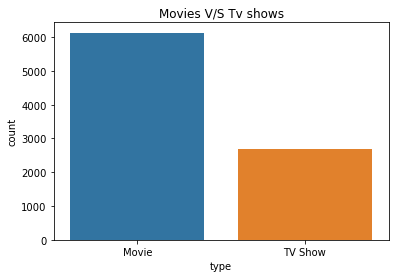

In [33]:
sns.countplot(x='type',data=df)
plt.title("Movies V/S Tv shows")
plt.show()


<div class="alert alert-block alert-success">
<b>Insight:</b> We can clearly see from above plots that movies are aroung 69% and tv shows are around 30%. This gives a little idea that people like to watch movies more in comparison to tv shows
</div>



#### The below code with divide the dataset into two parts i.e. movies and tv shows

In [35]:
movies = df[df['type']=='Movie'].reset_index()
movies.drop('index',axis=1,inplace=True)
tv_shows = df[df['type']=='TV Show'].reset_index()
tv_shows.drop('index',axis=1,inplace=True)
movies.to_csv('movies.csv')
tv_shows.to_csv('tv_shows.csv')

***

## Analyzing Movies Dataset

In [36]:
movies = pd.read_csv('movies.csv',index_col=0)

In [37]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


### Detecting and handling null values

In [39]:
movies.isnull().sum()/movies.shape[0]*100

show_id         0.000000
type            0.000000
title           0.000000
director        3.066384
cast            7.747513
country         7.176643
date_added      0.000000
release_year    0.000000
rating          0.032621
duration        0.048932
listed_in       0.000000
description     0.000000
dtype: float64

Since the number of null values is pretty less i.e around 7% for cast and country and 3% for director and negligible for rating and duration. Dropping them will will not lead to major data loss , we can simply drop them


<div class="alert alert-block alert-success">
<b>Handling Missing Value:</b> Since the number of null values is pretty less i.e around 7% for cast and country and 3% for director and negligible for rating and duration. Dropping them will will not lead to major data loss , we can simply drop them

</div>



In [40]:
movies.dropna(axis=0,inplace=True)

In [41]:
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Preprocessing the data
 - In the preprocessing of data, we'll remove the columns which dont add any value to our analysis
     - Show Id-> this can be removed, since it is not movie related
     - type -> this can be removed, since we know all the movies in the dataset has same type i.e. movies
    - Description-> For now we can remove this, since we dont have idea about how to use nlp techniques to get insights(This can be used in future when we use nlp techniques also for analysis)
- converting duration column to number type with unit minute
- date_added dtype can be converted to datetime object
- We'll unnest the actor, director, country and listed_in column
- remove duplicate columns, if any

In [42]:
drop_columns = ['show_id','type','description']
movies.drop(drop_columns,axis=1,inplace=True)

In [43]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
10,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
12,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies


In [44]:
movies['duration'] = movies['duration'].apply(lambda x: int(x.split(" ")[0]))
movies['date_added'] = pd.to_datetime(movies['date_added'])

In [45]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies"
10,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies"
12,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,Comedies


In [46]:
movies[movies.duplicated()]

,title,director,cast,country,date_added,release_year,rating,duration,listed_in


### Outlier detection and handling

#### For outlier detection, we'll mainly focus on our numerical data i.e. duration column

In [47]:
pd.DataFrame(movies['duration'].describe())

,duration
count,5185.000000
mean,102.701446
std,25.962914
min,8.000000
25%,89.000000
50%,101.000000
75%,117.000000
max,253.000000


<div class="alert alert-block alert-success">
<b>Insight:</b> - In the above analysis we can see that the mean is 108 but maximum value is 253, this gives a slight idea of existence of an outlier. We'll look deeper into this using plots and statistical techniques
</div>

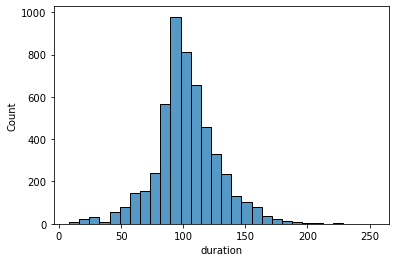

In [48]:
sns.histplot(data=movies, x="duration",bins=30)
plt.show()

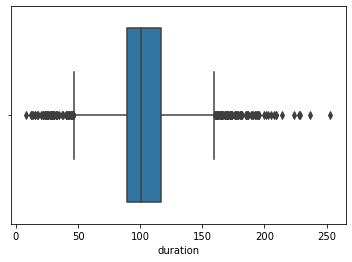

In [49]:
sns.boxplot(x='duration',data=movies)
plt.show()

#### The boxplot clearly shows presence of outlier values in duration column. Let's use the IQR formula to find the columns which are acting as outliers

In [50]:
# we'll look into the outliers by using IQR formula
IQR = np.percentile(movies['duration'],75)-np.percentile(movies['duration'],25)

In [51]:
IQR

28.0

In [52]:
movies['listed_in'] = movies['listed_in'].apply(lambda x: x.split(", "))
listed_in_movies = movies.explode('listed_in')
listed_in_movies

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Independent Movies
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,International Movies
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,Comedies
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,Dramas
...,...,...,...,...,...,...,...,...,...
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,Children & Family Movies
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,Comedies
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,Dramas
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,International Movies


In [53]:
lower_range_outlier_movies = listed_in_movies[(listed_in_movies['duration']< 
                                               np.percentile(listed_in_movies['duration'],25)-1.5*IQR)].reset_index()

In [54]:
higher_range_outlier_movies = listed_in_movies[(listed_in_movies['duration'] >
                                                np.percentile(listed_in_movies['duration'],75)+1.5*IQR)].reset_index()

In [55]:
pd.DataFrame(lower_range_outlier_movies['listed_in'].value_counts())

,listed_in
Children & Family Movies,65
Comedies,31
Documentaries,21
Dramas,14
International Movies,13
Stand-Up Comedy,12
Movies,10
Independent Movies,7
Sports Movies,4
Music & Musicals,3


In [56]:
pd.DataFrame(higher_range_outlier_movies['listed_in'].value_counts())

,listed_in
Dramas,96
International Movies,92
Action & Adventure,41
Comedies,30
Romantic Movies,20
Classic Movies,15
Music & Musicals,15
Thrillers,5
Independent Movies,4
Sci-Fi & Fantasy,4


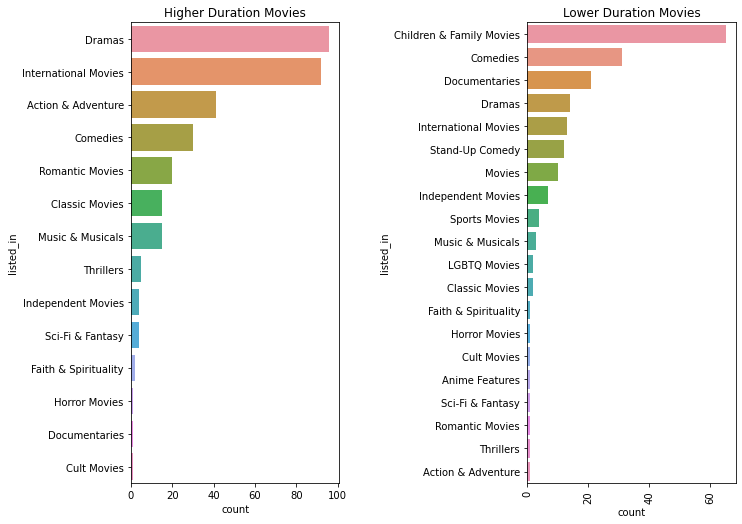

In [57]:
fig,axes = plt.subplots(1,2,figsize=(12,8))

sns.countplot(ax=axes[0],y='listed_in',data=higher_range_outlier_movies,order=
              higher_range_outlier_movies['listed_in'].value_counts().index)

plt.xticks(rotation=90)
axes[0].set_title("Higher Duration Movies")

sns.countplot(ax=axes[1],y='listed_in',data=lower_range_outlier_movies,order=
              lower_range_outlier_movies['listed_in'].value_counts().index)
plt.xticks(rotation=90)
axes[1].set_title("Lower Duration Movies")

plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.4)
plt.show()

In [58]:
higher_range_df = pd.DataFrame(higher_range_outlier_movies.groupby('listed_in')['duration']
                               .mean().sort_values(ascending=False))
higher_range_df.rename({'duration':'mean duration'},inplace=True,axis=1)
higher_range_df

,mean duration
listed_in,
Documentaries,208.000000
Classic Movies,187.933333
Sci-Fi & Fantasy,185.000000
Faith & Spirituality,183.500000
Music & Musicals,180.333333
Comedies,177.666667
Dramas,177.479167
Independent Movies,177.250000
International Movies,175.315217


In [59]:
lower_range_df = pd.DataFrame(lower_range_outlier_movies.groupby('listed_in')['duration']
                              .mean().sort_values(ascending=False))
lower_range_df.rename({'duration':'mean duration'},inplace=True,axis=1)
lower_range_df

,mean duration
listed_in,
Cult Movies,47.000000
Romantic Movies,46.000000
Anime Features,46.000000
LGBTQ Movies,45.000000
Stand-Up Comedy,42.083333
Action & Adventure,40.000000
Documentaries,37.904762
Children & Family Movies,34.784615
Comedies,33.129032



<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis that these outliers are not due to any incorrect record rather they show that some movies can be as long as 3 hrs and even short at 12 minutes. By looking at higher duration range movies we can assume that drama movies are usually of higher duration but we can also find some drame movies in lower duration range movies. On the outlier, we can conclude that they are actual records and not any misinterpretation. So we don't need to treat them

</div>

In [60]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"[Comedies, Dramas]"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]"
10,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"[Comedies, International Movies, Romantic Movies]"
12,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103,[Comedies]


In [61]:
movies['country'] = movies['country'].apply(lambda x: x.split(", "))
top_movies_list = movies.explode('country')

In [62]:
top_15_movie_producing_countries = (pd.DataFrame(top_movies_list['country'].value_counts())).head(15)

In [63]:
top_15_movie_producing_countries = top_15_movie_producing_countries.reset_index()
top_15_movie_producing_countries=top_15_movie_producing_countries.rename({'index':'Country','country':'Total Movies'}
                                                                         ,axis=1)

In [64]:
top_15_movie_producing_countries['Total Percentage'] = top_15_movie_producing_countries['Total Movies']/top_movies_list.shape[0]*100
top_15_movie_producing_countries

,Country,Total Movies,Total Percentage
0,United States,2444,36.483057
1,India,932,13.912524
2,United Kingdom,461,6.881624
3,Canada,287,4.284222
4,France,285,4.254366
5,Germany,165,2.463054
6,Spain,152,2.268995
7,Japan,113,1.686819
8,China,107,1.597253
9,Egypt,99,1.477833


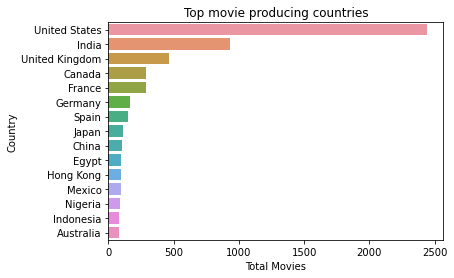

In [65]:
sns.barplot(y='Country',x='Total Movies', data=top_15_movie_producing_countries)
plt.title("Top movie producing countries")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis of countries producing movies, around 75% of the movies are produced by top 10 movie producing countries. For our follow up analysis, we can mainly focus on these top 10 countries
</div>

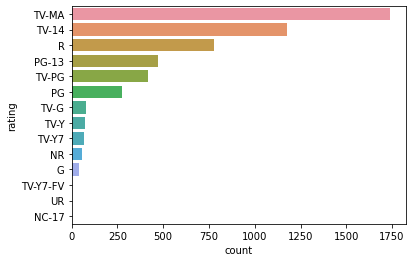

In [67]:
sns.countplot(y='rating',data=movies,order=movies['rating'].value_counts().index)
plt.show()

#### Now we'll analyze what kind of movies are popular in top 7 movie producing countries

In [68]:
top_7_movie_producing_countries = (pd.DataFrame(top_movies_list['country'].value_counts())).head(7).index.to_list()

In [69]:
top_7_movie_producing_countries = top_movies_list[top_movies_list['country'].isin(top_7_movie_producing_countries)]

In [70]:
country_wise_top_preferred_rating_movies = top_7_movie_producing_countries.groupby(['country','rating'])
country_wise_top_preferred_rating_movies=country_wise_top_preferred_rating_movies['rating'].value_counts().nlargest(4)

In [71]:
country_wise_top_preferred_rating_movies

country        rating  rating
United States  R       R         652
               TV-MA   TV-MA     605
India          TV-14   TV-14     535
United States  PG-13   PG-13     423
Name: rating, dtype: int64

In [72]:
country_wise_top_rating_movies = top_7_movie_producing_countries.groupby('country')
country_wise_top_rating_movies = country_wise_top_rating_movies['rating'].value_counts().groupby(level=0).head(3)
country_wise_top_rating_movies = country_wise_top_rating_movies.sort_values(ascending=False).to_frame('counts')
country_wise_top_rating_movies = country_wise_top_rating_movies.reset_index()

In [73]:
country_wise_top_rating_movies

,country,rating,counts
0,United States,R,652
1,United States,TV-MA,605
2,India,TV-14,535
3,United States,PG-13,423
4,India,TV-MA,228
5,United Kingdom,R,144
6,India,TV-PG,124
7,Spain,TV-MA,116
8,France,TV-MA,116
9,United Kingdom,TV-MA,110


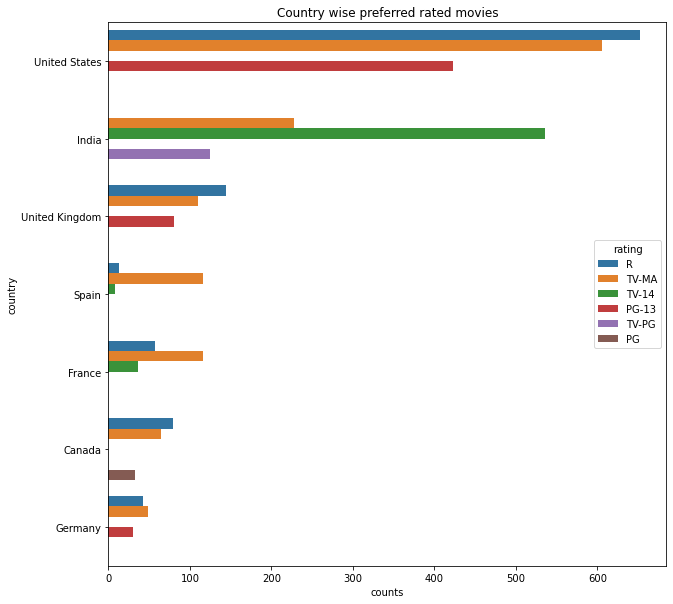

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(x='counts',y='country',data=country_wise_top_rating_movies,hue='rating')
plt.title("Country wise preferred rated movies")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> -From the above analysis we can see that what type of rated movies are preferred by each type of country.This will help netflix to focus on content countrywise
</div>

In [75]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021-09-24,2021,PG-13,104,"[Comedies, Dramas]"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]"
10,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",[India],2021-09-21,1998,TV-14,166,"[Comedies, International Movies, Romantic Movies]"
12,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",[United States],2021-09-20,2010,PG-13,103,[Comedies]


#### Now we'll focus on what kind of movies are getting released recently in last five years

In [76]:
movies['year_added'] = movies['date_added'].dt.year

In [77]:
movies['year_added'].max(),movies['year_added'].min()

(2021, 2008)

<div class="alert alert-block alert-info">
<b>Comment:</b> Since Netflix started in 2008 and last data is of year 2021, we know that we have data for last 13 year.Now we can analyze 
how people preference are changing with time. Two approaches can be taken here<br>
1) We can analyze the trend country wise<br>
2) We can analyze the trend at the global level<br>
</div>

In [78]:
movies.head()

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov...",2021
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021-09-24,2021,PG-13,104,"[Comedies, Dramas]",2021
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]",2021
10,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",[India],2021-09-21,1998,TV-14,166,"[Comedies, International Movies, Romantic Movies]",2021
12,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",[United States],2021-09-20,2010,PG-13,103,[Comedies],2021


In [79]:
listed_in_movies = movies.explode('listed_in')
listed_in_movies

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,Dramas,2021
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,Independent Movies,2021
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125,International Movies,2021
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021-09-24,2021,PG-13,104,Comedies,2021
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",[United States],2021-09-24,2021,PG-13,104,Dramas,2021
...,...,...,...,...,...,...,...,...,...,...
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2020-01-11,2006,PG,88,Children & Family Movies,2020
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2020-01-11,2006,PG,88,Comedies,2020
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",[India],2019-03-02,2015,TV-14,111,Dramas,2019
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",[India],2019-03-02,2015,TV-14,111,International Movies,2019


In [80]:
year_wise_genre_preference = listed_in_movies.groupby('year_added')['listed_in'].value_counts().groupby(level=0)
year_wise_genre_preference = year_wise_genre_preference.head(3).sort_values(ascending=False).to_frame('counts')
year_wise_genre_preference = year_wise_genre_preference.reset_index()
year_wise_genre_preference


,year_added,listed_in,counts
0,2018,International Movies,616
1,2019,Dramas,541
2,2019,International Movies,534
3,2020,International Movies,522
4,2020,Dramas,518
5,2018,Dramas,515
6,2020,Comedies,396
7,2019,Comedies,389
8,2017,International Movies,344
9,2021,Dramas,340


In [81]:
year_wise_genre_preference.sort_values(by='year_added')

,year_added,listed_in,counts
40,2008,Dramas,1
30,2008,Thrillers,1
34,2008,Independent Movies,1
31,2009,Dramas,1
32,2009,Horror Movies,1
33,2009,International Movies,1
29,2010,Cult Movies,1
35,2010,Horror Movies,1
36,2011,Children & Family Movies,1
28,2011,Sports Movies,2


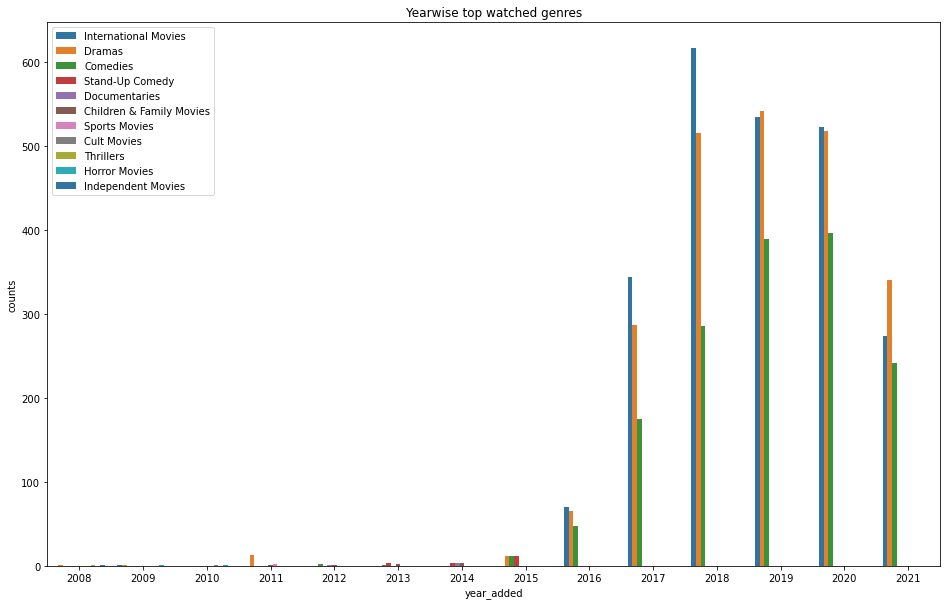

In [82]:
plt.figure(figsize=(16,10))
sns.barplot(x='year_added',y='counts',data=year_wise_genre_preference,
            hue='listed_in',palette=sns.color_palette("tab10"))
plt.legend(loc='upper left')
plt.title("Yearwise top watched genres")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> -From the above plot we can clearly see that in the last 5 years, people have consistently liked 'Comedies','International Movies' and 'Dramas' accompanied with very high viewership.
</div>

In [87]:
top_7_movie_producing_countries_genrewise = top_7_movie_producing_countries.explode('listed_in')
top_7_movie_producing_countries_genrewise

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,Independent Movies
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,International Movies
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125,Dramas
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125,Independent Movies
...,...,...,...,...,...,...,...,...,...
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,Children & Family Movies
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,Comedies
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,Dramas
6130,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,International Movies


In [88]:
country_wise_genre_preference = top_7_movie_producing_countries_genrewise.groupby('country')['listed_in']
country_wise_genre_preference = country_wise_genre_preference.value_counts().groupby(level=0).head(3)
country_wise_genre_preference = country_wise_genre_preference.sort_values(ascending=False).to_frame('counts')
country_wise_genre_preference = country_wise_genre_preference.reset_index()
country_wise_genre_preference


,country,listed_in,counts
0,India,International Movies,840
1,United States,Dramas,827
2,United States,Comedies,667
3,India,Dramas,657
4,United States,Action & Adventure,401
5,India,Comedies,319
6,United Kingdom,Dramas,194
7,France,International Movies,191
8,France,Dramas,167
9,United Kingdom,International Movies,138


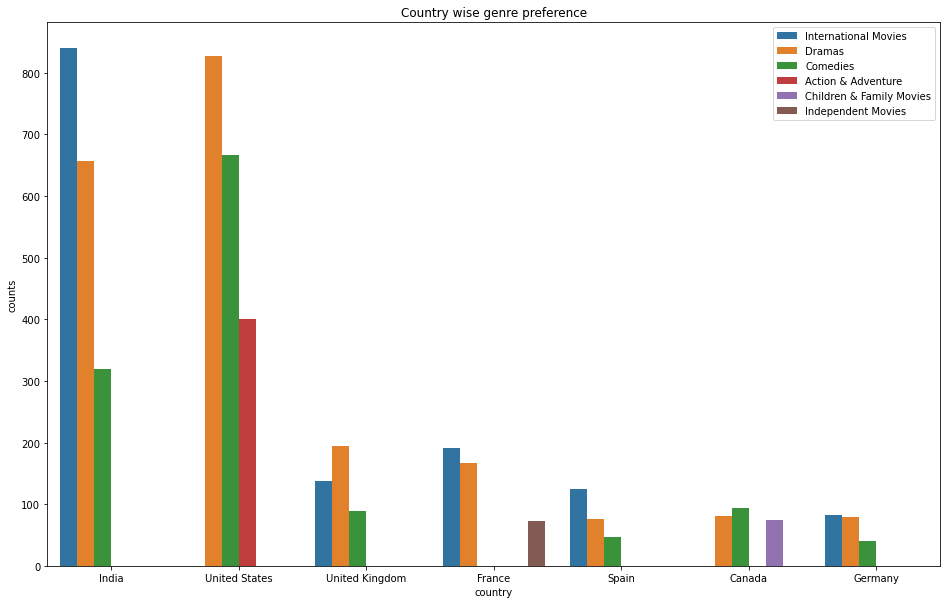

In [89]:
plt.figure(figsize=(16,10))

sns.barplot(x='country',y='counts',data=country_wise_genre_preference,hue='listed_in')
plt.legend(loc='upper right')
plt.title("Country wise genre preference")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> -From the above plot we can clearly see that countrywise 'Dramas' and 'comedies' are liked by most of the top 7 movie producing countries
</div>

#### Now we'll focus on the cast column and analyze which are the famous actors nationwise, we'll be focusing on the top 7 movie producing countries

In [91]:
top_7_movie_producing_countries

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
3,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"[Comedies, Dramas]"
4,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]"
...,...,...,...,...,...,...,...,...,...
6125,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120,"[Dramas, International Movies]"
6127,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]"
6128,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
6129,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"


In [92]:
top_7_movie_producing_countries['cast'] = top_7_movie_producing_countries['cast'].apply(lambda x: x.split(", "))
top_7_movie_producing_countries_topcast = top_7_movie_producing_countries.explode('cast')
top_7_movie_producing_countries_topcast

/var/folders/kq/0bdtsq2j33760qf6gclvdx840000gn/T/ipykernel_1353/733255939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_7_movie_producing_countries['cast'] = top_7_movie_producing_countries['cast'].apply(lambda x: x.split(", "))


,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,Kofi Ghanaba,United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,Oyafunmike Ogunlano,United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,Alexandra Duah,United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,Nick Medley,United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,Mutabaruka,United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
...,...,...,...,...,...,...,...,...,...
6130,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
6130,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
6130,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"
6130,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,"[Dramas, International Movies, Music & Musicals]"


In [93]:
country_wise_top_actors = top_7_movie_producing_countries_topcast.groupby('country')['cast'].value_counts()
country_wise_top_actors = country_wise_top_actors.groupby(level=0).head(5).sort_values(ascending=False)
country_wise_top_actors = country_wise_top_actors.to_frame('counts').reset_index()
country_wise_top_actors

,country,cast,counts
0,India,Anupam Kher,40
1,India,Shah Rukh Khan,34
2,India,Naseeruddin Shah,31
3,India,Om Puri,29
4,India,Akshay Kumar,29
5,United States,Samuel L. Jackson,21
6,United States,Adam Sandler,20
7,United States,James Franco,19
8,United States,Nicolas Cage,18
9,United States,Bruce Willis,15


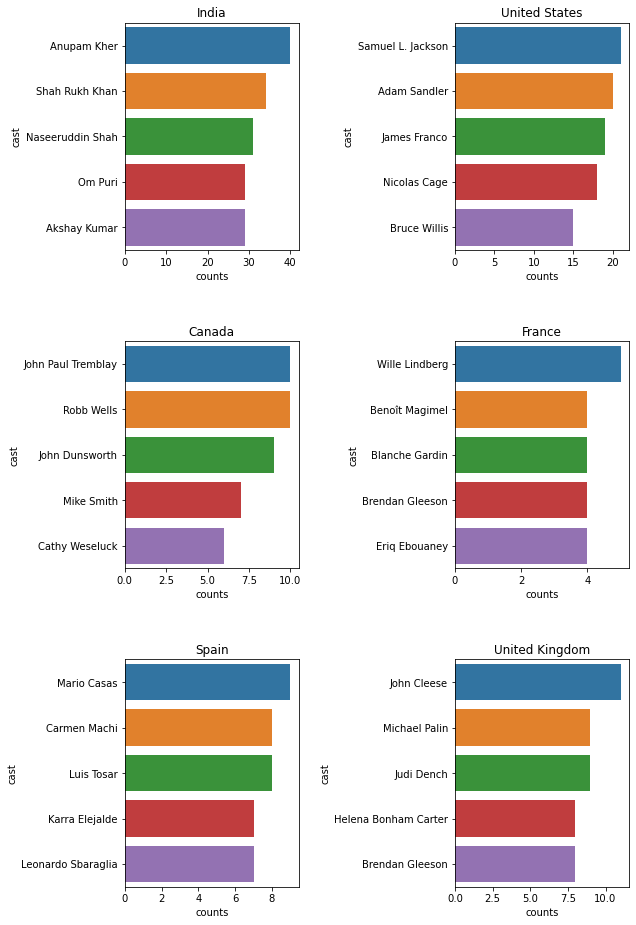

In [94]:
f, axes = plt.subplots(3, 2,figsize=(10,15))
plt.subplots_adjust(hspace = 0.9)

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='India'],
            ax=axes[0][0]).set(title='India')

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='United States'],
            ax=axes[0][1]).set(title='United States')

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='Canada'],
            ax=axes[1][0]).set(title='Canada')

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='France'],
            ax=axes[1][1]).set(title='France')

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='Spain'],
            ax=axes[2][0]).set(title='Spain')

sns.barplot(x='counts',y='cast',data=country_wise_top_actors[country_wise_top_actors['country']=='United Kingdom'],
            ax=axes[2][1]).set(title='United Kingdom')

plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.4)

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above plots we can see which actors are famous in each country and using this, we can recommend these actors movies for each country individually
</div>

#### We'll look into country-wise top directors

In [95]:
top_7_movie_producing_countries

,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United Kingdom,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",Germany,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
3,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",United States,2021-09-24,2021,PG-13,104,"[Comedies, Dramas]"
4,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",Germany,2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]"
...,...,...,...,...,...,...,...,...,...
6125,Zenda,Avadhoot Gupte,"[Santosh Juvekar, Siddharth Chandekar, Sachit ...",India,2018-02-15,2009,TV-14,120,"[Dramas, International Movies]"
6127,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]"
6128,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
6129,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"


In [96]:
top_7_movie_producing_countries['director']=top_7_movie_producing_countries['director'].apply(lambda x: x.split(", "))
top_7_movie_producing_countries_top_directors = top_7_movie_producing_countries.explode('director')
top_7_movie_producing_countries_top_directors

/var/folders/kq/0bdtsq2j33760qf6gclvdx840000gn/T/ipykernel_1353/2284285636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_7_movie_producing_countries['director']=top_7_movie_producing_countries['director'].apply(lambda x: x.split(", "))


,title,director,cast,country,date_added,release_year,rating,duration,listed_in
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United States,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",United Kingdom,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
2,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",Germany,2021-09-24,1993,TV-MA,125,"[Dramas, Independent Movies, International Mov..."
3,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",United States,2021-09-24,2021,PG-13,104,"[Comedies, Dramas]"
4,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",Germany,2021-09-23,2021,TV-MA,127,"[Dramas, International Movies]"
...,...,...,...,...,...,...,...,...,...
6125,Zenda,Avadhoot Gupte,"[Santosh Juvekar, Siddharth Chandekar, Sachit ...",India,2018-02-15,2009,TV-14,120,"[Dramas, International Movies]"
6127,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,158,"[Cult Movies, Dramas, Thrillers]"
6128,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
6129,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"


In [97]:
country_wise_top_directors = top_7_movie_producing_countries_top_directors.groupby('country')['director']
country_wise_top_directors = country_wise_top_directors.value_counts().groupby(level=0).head(5)
country_wise_top_directors = country_wise_top_directors.sort_values(ascending=False).to_frame('counts').reset_index()
country_wise_top_directors

,country,director,counts
0,United States,Jay Karas,15
1,United States,Marcus Raboy,14
2,United States,Martin Scorsese,12
3,United States,Jay Chapman,12
4,United States,Steven Spielberg,11
5,India,David Dhawan,9
6,India,Anurag Kashyap,8
7,Canada,Justin G. Dyck,8
8,India,Umesh Mehra,8
9,India,Dibakar Banerjee,7


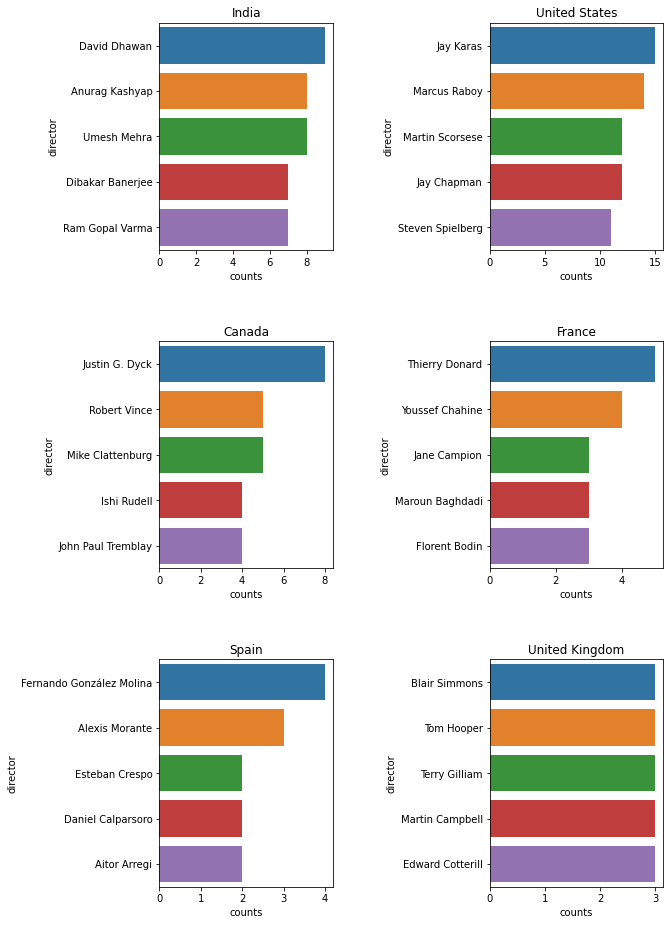

In [98]:
f, axes = plt.subplots(3, 2,figsize=(10,15))
plt.subplots_adjust(hspace = 0.9)

sns.barplot(x='counts',y='director',data=country_wise_top_directors[country_wise_top_directors['country']=='India'],
            ax=axes[0][0]).set(title='India')

sns.barplot(x='counts',y='director',data=
            country_wise_top_directors[country_wise_top_directors['country']=='United States'],
            ax=axes[0][1]).set(title='United States')

sns.barplot(x='counts',y='director',
            data=country_wise_top_directors[country_wise_top_directors['country']=='Canada'],
            ax=axes[1][0]).set(title='Canada')

sns.barplot(x='counts',y='director',
            data=country_wise_top_directors[country_wise_top_directors['country']=='France'],
            ax=axes[1][1]).set(title='France')

sns.barplot(x='counts',y='director',
            data=country_wise_top_directors[country_wise_top_directors['country']=='Spain'],
            ax=axes[2][0]).set(title='Spain')

sns.barplot(x='counts',y='director',data=
            country_wise_top_directors[country_wise_top_directors['country']=='United Kingdom'],
            ax=axes[2][1]).set(title='United Kingdom')

plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.4)

## Analyzing TV Shows 

In [99]:
tv_shows = pd.read_csv('tv_shows.csv',index_col=0)

In [100]:
## Lets look at the shape of the dataset
tv_shows.shape

(2676, 12)

In [101]:
tv_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 0 to 2675
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 271.8+ KB


In [102]:
tv_shows.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,2676,2676,2676,230,2326,2285,2666,2674,2676,2676,2676
unique,2676,1,2676,222,2283,196,1051,9,15,236,2672
top,s2,TV Show,Blood & Water,Alastair Fothergill,David Attenborough,United States,"July 6, 2021",TV-MA,1 Season,Kids' TV,This educational series for tiny tots features...
freq,1,2676,1,3,14,760,31,1145,1793,220,2


### Handling Missing Values

In [103]:
data = pd.DataFrame(tv_shows.isnull().sum()/tv_shows.shape[0]*100)
data

,0
show_id,0.000000
type,0.000000
title,0.000000
director,91.405082
cast,13.079223
country,14.611360
date_added,0.373692
release_year,0.000000
rating,0.074738
duration,0.000000


<div class="alert alert-block alert-info">
<b>Comment:</b> We can see that around 91% of the directors are missing.Since there are too many missing values in director column, we are simply going to drop them.
</div>

In [104]:
tv_shows.drop('director',axis=1,inplace=True)

In [105]:
tv_shows.isnull().sum()/tv_shows.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
cast            13.079223
country         14.611360
date_added       0.373692
release_year     0.000000
rating           0.074738
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [106]:
tv_shows = tv_shows.dropna()

In [107]:
# After removing the missing values we have around 2013 rows and 11 columns
tv_shows.shape

(2013, 11)

### removing columns which are not required

In [108]:
drop_columns = ['show_id','type','description']
tv_shows.drop(drop_columns,axis=1,inplace=True)

In [109]:
tv_shows = tv_shows.reset_index()

In [110]:
tv_shows.drop('index',axis=1,inplace=True)

In [111]:
tv_shows.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas"
4,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ..."


### Now we are going to perform some preprocessing which will include the following steps
- Expanding cast, listed_in and country columns
- converting date_added to datetime object
- converting duration to numbers

In [112]:
tv_shows['date_added'] = pd.to_datetime(tv_shows['date_added'])

In [113]:
tv_shows['duration'] = tv_shows['duration'].apply(lambda x: x.split(" ")[0])

In [114]:
tv_shows.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV"
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas"
4,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ..."


In [115]:
# we can see that after expanding all the columns we have around 48237 rows and 8 columns
tv_shows.shape

(2013, 8)

In [116]:
# Lets look for any duplicate rows in the dateset
tv_shows[tv_shows.duplicated()]

,title,cast,country,date_added,release_year,rating,duration,listed_in


In [117]:
tv_shows.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV"
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas"
4,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ..."


In [118]:
tv_shows['country'] = tv_shows['country'].apply(lambda x: x.split(", "))
tv_shows = tv_shows.explode('country')
tv_shows.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV"
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas"
4,Falsa identidad,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ..."


In [119]:
top_5_tv_shows_producing_countries = pd.DataFrame(tv_shows['country'].value_counts()/tv_shows.shape[0]*100).iloc[:5]

In [120]:
top_5_tv_shows_producing_countries

,country
United States,33.390265
United Kingdom,9.906063
Japan,8.240820
South Korea,7.173356
Canada,5.081127


In [121]:
top_5_tvshows_producing_countries = (pd.DataFrame(tv_shows['country'].value_counts())).head(5)
top_5_tvshows_producing_countries=top_5_tvshows_producing_countries.reset_index()
top_5_tvshows_producing_countries = top_5_tvshows_producing_countries.rename(
    {'index':'Country','country':'Total Shows'},axis=1)

top_5_tvshows_producing_countries['Total %']=top_5_tvshows_producing_countries['Total Shows']/movies.shape[0]*100
top_5_tvshows_producing_countries

,Country,Total Shows,Total %
0,United States,782,15.081967
1,United Kingdom,232,4.474446
2,Japan,193,3.722276
3,South Korea,168,3.240116
4,Canada,119,2.295082


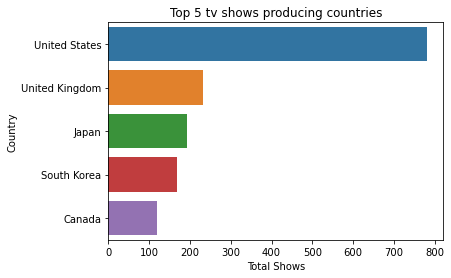

In [122]:
sns.barplot(y='Country',x='Total Shows', data=top_5_tvshows_producing_countries)
plt.title('Top 5 tv shows producing countries')
plt.show()


<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis we can say that most of the tv shows are made in US, Japan, UK, South Korea and Canada
</div>

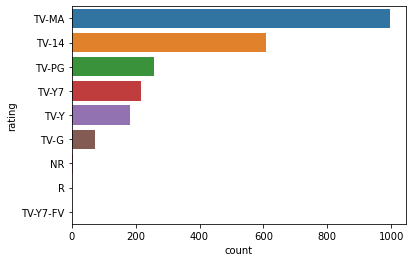

In [123]:
sns.countplot(y='rating',data=tv_shows,order=tv_shows['rating'].value_counts().index)
plt.show()

### Now we'll focus on top 5 tv shows producing countries

In [124]:
top_5_tvshows_producing_countries_name = top_5_tvshows_producing_countries['Country'].to_list()

In [125]:
top_5_tvshows_producing_countries_name

['United States', 'United Kingdom', 'Japan', 'South Korea', 'Canada']

In [126]:
top_5_countries = tv_shows[tv_shows['country'].isin(top_5_tvshows_producing_countries_name)]

In [127]:
country_wise_top_preferred_rating_shows = top_5_countries.groupby('country')['rating'].value_counts().groupby(level=0)
country_wise_top_preferred_rating_shows = country_wise_top_preferred_rating_shows.head(3).sort_values(ascending=False)
country_wise_top_preferred_rating_shows = country_wise_top_preferred_rating_shows.to_frame('counts').reset_index()

In [128]:
country_wise_top_preferred_rating_shows

,country,rating,counts
0,United States,TV-MA,298
1,United States,TV-14,187
2,United Kingdom,TV-MA,98
3,United States,TV-PG,97
4,South Korea,TV-14,82
5,Japan,TV-14,74
6,Japan,TV-MA,69
7,South Korea,TV-MA,55
8,United Kingdom,TV-PG,47
9,United Kingdom,TV-14,36


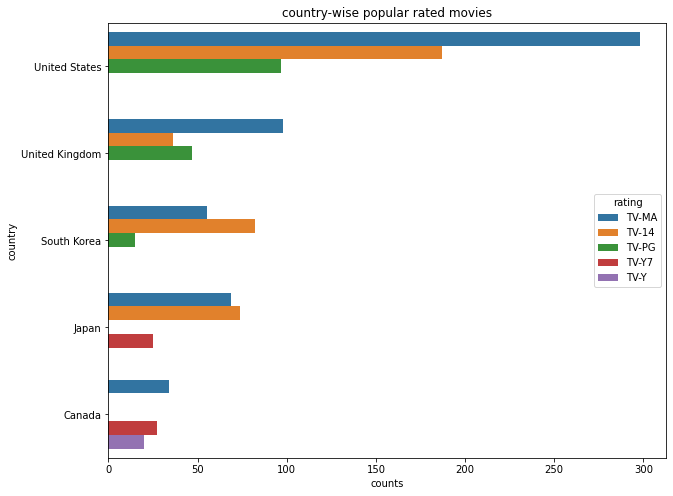

In [129]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='country',data=country_wise_top_preferred_rating_shows,hue='rating')
plt.title('country-wise popular rated movies')
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis we can say USA and UK both like TV-MA and South Korea likes TV-14 more than TV-MA
</div>

In [130]:
top_5_countries

,title,cast,country,date_added,release_year,rating,duration,listed_in
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV"
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas"
7,Sex Education,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3,"British TV Shows, International TV Shows, TV C..."
10,He-Man and the Masters of the Universe,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1,"Kids' TV, TV Sci-Fi & Fantasy"
13,Nailed It,"Nicole Byer, Jacques Torres",United States,2021-09-15,2021,TV-PG,6,Reality TV
...,...,...,...,...,...,...,...,...
2008,Yo-Kai Watch,"Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...",United States,2016-04-01,2015,TV-Y7,1,"Anime Series, Kids' TV"
2009,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Japan,2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV"
2009,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Canada,2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV"
2011,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...",United States,2018-09-13,2016,TV-Y7,3,Kids' TV


In [131]:
top_5_countries['listed_in'] = top_5_countries['listed_in'].apply(lambda x: x.split(", "))
tv_shows_listed_in = top_5_countries.explode('listed_in')
tv_shows_listed_in.head()

/var/folders/kq/0bdtsq2j33760qf6gclvdx840000gn/T/ipykernel_1353/1741804367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_countries['listed_in'] = top_5_countries['listed_in'].apply(lambda x: x.split(", "))


,title,cast,country,date_added,release_year,rating,duration,listed_in
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,British TV Shows
2,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,Reality TV
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,TV Comedies
3,Dear White People,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4,TV Dramas
7,Sex Education,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3,British TV Shows


In [132]:
country_wise_top_listed_shows = tv_shows_listed_in.groupby('country')['listed_in'].value_counts().groupby(level=0)
country_wise_top_listed_shows = country_wise_top_listed_shows.head(3).sort_values(ascending=False).to_frame('counts')
country_wise_top_listed_shows = country_wise_top_listed_shows.reset_index()

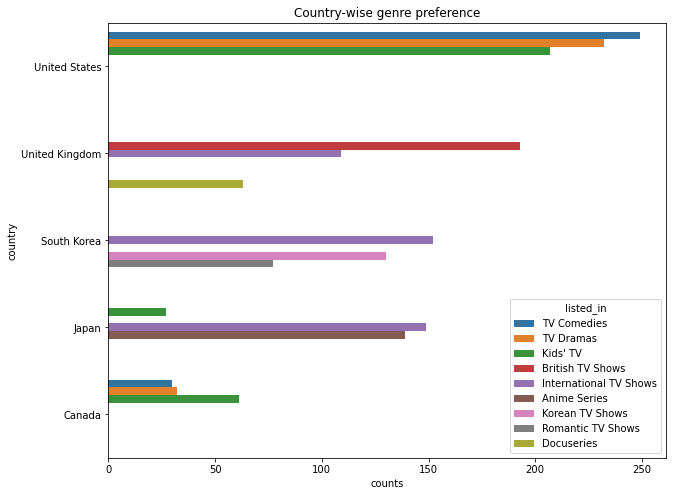

In [133]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='country',data=country_wise_top_listed_shows,hue='listed_in')
plt.title("Country-wise genre preference")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis we can say USA like drama more whereas Japan like anime series
</div>

In [134]:
top_5_countries['cast'] = top_5_countries['cast'].apply(lambda x: x.split(", "))
top_5_countries_cast = top_5_countries.explode('cast')
top_5_countries_cast.head()

/var/folders/kq/0bdtsq2j33760qf6gclvdx840000gn/T/ipykernel_1353/68867718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_countries['cast'] = top_5_countries['cast'].apply(lambda x: x.split(", "))


,title,cast,country,date_added,release_year,rating,duration,listed_in
2,The Great British Baking Show,Mel Giedroyc,United Kingdom,2021-09-24,2021,TV-14,9,"[British TV Shows, Reality TV]"
2,The Great British Baking Show,Sue Perkins,United Kingdom,2021-09-24,2021,TV-14,9,"[British TV Shows, Reality TV]"
2,The Great British Baking Show,Mary Berry,United Kingdom,2021-09-24,2021,TV-14,9,"[British TV Shows, Reality TV]"
2,The Great British Baking Show,Paul Hollywood,United Kingdom,2021-09-24,2021,TV-14,9,"[British TV Shows, Reality TV]"
3,Dear White People,Logan Browning,United States,2021-09-22,2021,TV-MA,4,"[TV Comedies, TV Dramas]"


In [135]:
country_wise_top_cast = top_5_countries_cast.groupby('country')['cast'].value_counts().groupby(level=0).head(3)
country_wise_top_cast = country_wise_top_cast.sort_values(ascending=False).to_frame('counts').reset_index()

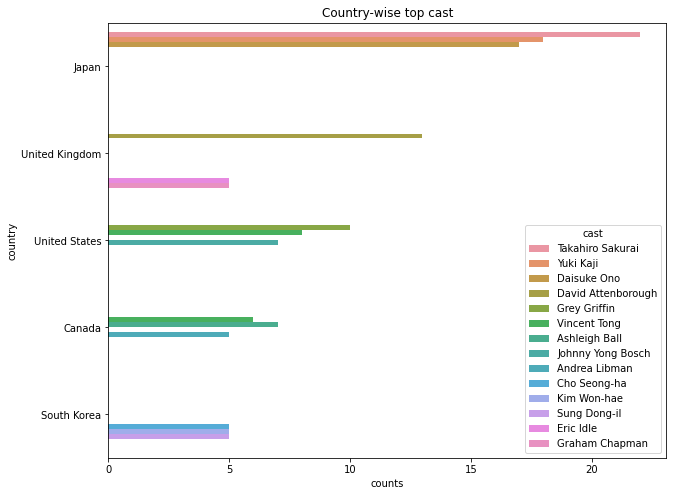

In [136]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts',y='country',data=country_wise_top_cast,hue='cast')
plt.title("Country-wise top cast")
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis we can see the top cast for each country
</div>

In [137]:
top_5_countries.head()

,title,cast,country,date_added,release_year,rating,duration,listed_in
2,The Great British Baking Show,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",United Kingdom,2021-09-24,2021,TV-14,9,"[British TV Shows, Reality TV]"
3,Dear White People,"[Logan Browning, Brandon P. Bell, DeRon Horton...",United States,2021-09-22,2021,TV-MA,4,"[TV Comedies, TV Dramas]"
7,Sex Education,"[Asa Butterfield, Gillian Anderson, Ncuti Gatw...",United Kingdom,2021-09-17,2020,TV-MA,3,"[British TV Shows, International TV Shows, TV ..."
10,He-Man and the Masters of the Universe,"[Yuri Lowenthal, Kimberly Brooks, Antony Del R...",United States,2021-09-16,2021,TV-Y7,1,"[Kids' TV, TV Sci-Fi & Fantasy]"
13,Nailed It,"[Nicole Byer, Jacques Torres]",United States,2021-09-15,2021,TV-PG,6,[Reality TV]


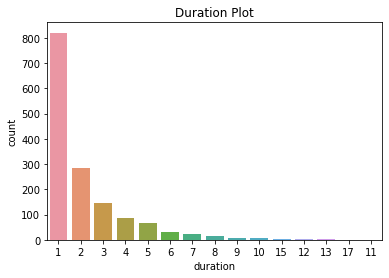

In [138]:
sns.countplot(x='duration',data=top_5_countries,order=top_5_countries['duration'].value_counts().index)
plt.title('Duration Plot')
plt.show()

<div class="alert alert-block alert-success">
<b>Insight:</b> - From the above analysis we can see the clearly see that as the number of season increases, peoples interest goes on decreasing.
</div>